In [1]:
# 데이터 파일 읽어들이기
import csv

f1 = open('LOCAL_PEOPLE_DONG_201912.csv', encoding = 'utf8')
data = csv.reader(f1)
next(data)
data = list(data)
print(len(data))

315456


In [2]:
# 데이터 파일 읽어들이기
f2 = open('dong_code.csv', encoding = 'utf8')
code_data = csv.reader(f2)
next(code_data)
next(code_data)
code_data = list(code_data)
print(len(code_data))

424


In [3]:
# 데이터 타입 변환하기 (인구 데이터)
for row in data:
    for i in range(1,32):
        if i <= 2:
            row[i] = int(row[i])
        else:
            row[i] = float(row[i])
            
print(data[0])

['20191201', 0, 11215710, 45694.9988, 452.3937, 208.7971, 1267.7678, 5642.9235, 5433.6801, 2494.5993, 1691.4831, 1042.7096, 1058.3378, 895.4639, 875.9212, 601.9097, 496.2165, 850.682, 388.4005, 180.3721, 1586.7039, 6973.6176, 4259.7022, 2036.1446, 1285.42, 794.6241, 833.7179, 772.1417, 773.2152, 827.1455, 565.5378, 1405.3707, '']


In [4]:
# 데이터 타입 변환하기 (행정동 코드 변환하기)
for row in code_data:
    row[1] = int(row[1])
    
print(code_data[0])

['1101053', 11110530, '서울', '종로구', '사직동']


In [5]:
# 행정동명과 행정동코드 연결하기
# 행정동명 = oo동

dong_name = input('핫플레이스가 위치한 행정동을 입력하세요.')

for row in code_data:
    if row[-1]== dong_name:
        dong_code = row[1]
    
print(dong_name, '-', dong_code, '을(를) 분석합니다!')

핫플레이스가 위치한 행정동을 입력하세요.압구정동
압구정동 - 11680545 을(를) 분석합니다!


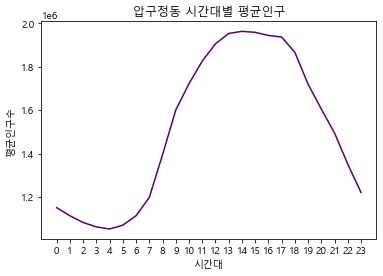

In [6]:
# 시간대별 인구 분석하기
import matplotlib.pyplot as plt

population = []
for i in range(24):
    population.append(0)
# population = [0 for i in range(24)] 위의 세 줄을 한 줄로 줄이는 경우

for row in data:
    if dong_code == row[2]:
        time, p = row[1], row[3]
        population[time] += p

populatiion = [p/31 for p in population]

plt.rc('font', family = 'Malgun Gothic')
plt.title(dong_name +' 시간대별 평균인구')
plt.plot(range(24), population, color = 'indigo')
plt.xticks(range(24), range(24))
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.show()

In [7]:
# 주중과 주말 구분하는 datetime 라이브러리
import datetime

# 0 - 월, 1 - 화, 2 - 수, 3 - 목, 4 - 금, 5 - 토, 6 - 일
datetime.date(2022, 3, 18).weekday()

4

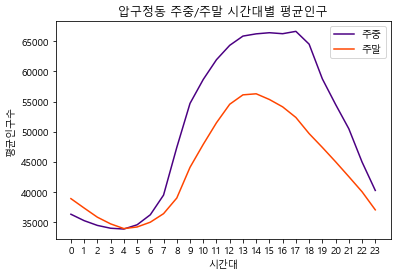

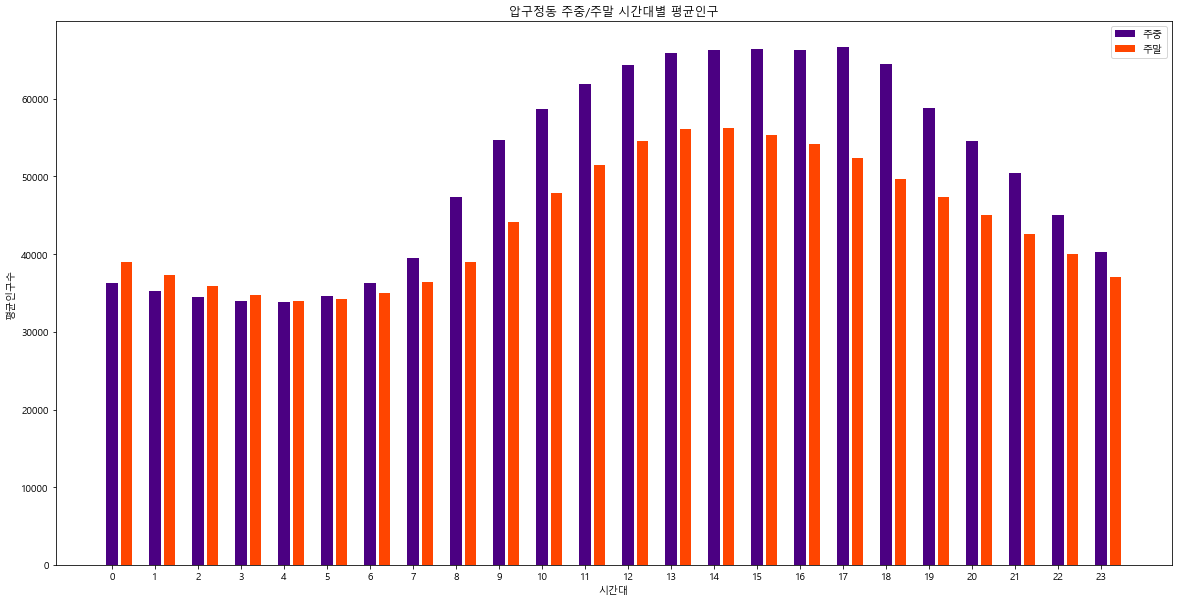

In [8]:
# 주중/주말 시간대별 인구 분석하기
weekday = [0 for i in range(24)]
weekend = [0 for i in range(24)]

for row in data:
    if row[2] == dong_code:
        time, p = row[1], row[3]
        year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
        num = datetime.date(year,mon,day).weekday()
        if  num <= 4:
            weekday[time] += p
        else:
            weekend[time] += p
            
weekday_cnt, weekend_cnt = 0, 0

for i in range(1,32):
    if datetime.date(2019,12,i).weekday() <= 4:
        weekday_cnt += 1
    else:
        weekend_cnt += 1

weekday = [w/weekday_cnt for w in weekday]
weekend = [w/weekend_cnt for w in weekend]

plt.title(dong_name + ' 주중/주말 시간대별 평균인구')
plt.plot(weekday, color = 'indigo', label = '주중')
plt.plot(weekend, color = 'orangered', label = '주말')
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.xticks(range(24), range(24))
plt.show()

plt.figure(figsize =(20, 10))
plt.title(dong_name + ' 주중/주말 시간대별 평균인구')
plt.bar(range(0, 72, 3), weekday, color = 'indigo', label = '주중')
plt.bar(range(1, 73, 3), weekend, color = 'orangered', label = '주말')
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.xticks(range(0, 72, 3), range(24))
plt.show()

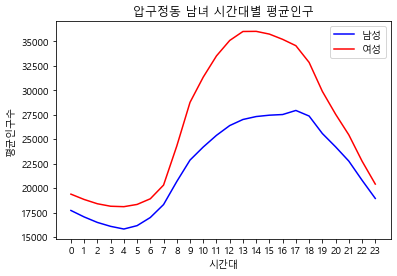

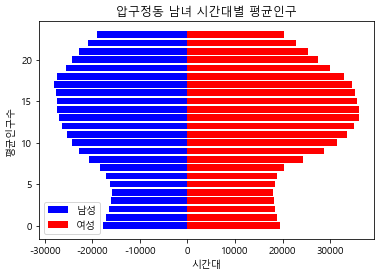

In [9]:
# 남녀 시간대별 평균인구 분석하기
import matplotlib

male = [0 for i in range(24)]
female = [0 for i in range(24)]

for row in data:
    if dong_code == row[2]:
        time = row[1]
        male[time] += sum(row[4:18])
        female[time] += sum(row[18:32])
    
male = [m/31 for m in male]
female = [f/31 for f in female]

plt.title(dong_name + ' 남녀 시간대별 평균인구')
plt.plot(male, color = 'b', label = '남성')
plt.plot(female, color = 'r', label = '여성')
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.xticks(range(24), range(24))
plt.legend()
plt.show()

male = [-m for m in male]
matplotlib.rcParams['axes.unicode_minus'] = False

plt.title(dong_name + ' 남녀 시간대별 평균인구')
plt.barh(range(24), male, color = 'b', label = '남성')
plt.barh(range(24), female, color = 'r', label = '여성')
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.legend()
plt.show()

핫플레이스가 위치한 행정동을 입력하세요.압구정동
비교할 행정동을 입력하세요.역삼2동


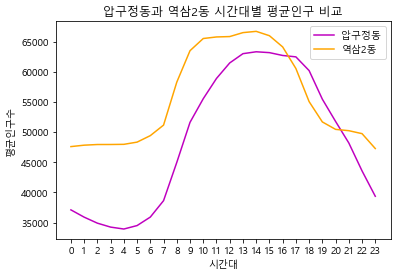

In [11]:
# 다른 지역과 인구 비교 분석하기

dong_name = input('핫플레이스가 위치한 행정동을 입력하세요.')

for row in code_data:
    if row[-1]== dong_name:
        dong_code = row[1]

dong_name2 = input('비교할 행정동을 입력하세요.')

for row in code_data:
    if row[-1]== dong_name2:
        dong_code2 = row[1]
        
population = [0 for i in range(24)]
population2 = [0 for i in range(24)]

for row in data:
    if dong_code == row[2]:
        time, p = row[1], row[3]
        population[time] += p
    elif dong_code2 == row[2]:
        time, p = row[1], row[3]
        population2[time] += p
        
population = [p/31 for p in population]
population2 = [p/31 for p in population2]

plt.title(dong_name + '과 ' + dong_name2 + ' 시간대별 평균인구 비교')
plt.plot(population, color = 'm', label = dong_name)
plt.plot(population2, color = 'orange', label = dong_name2)
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.xticks(range(24), range(24))
plt.show()